2917 lines successfully read from file: data_log_files/weight_node_node2.txt
11486 total errors detected.
A total of 175 unique nodes were detected in the log file
175 nodes had send errors.
38 nodes had receive errors.
****************************************************************************************************
The top 25 servers with receiving fails
             fails
receiver          
10.12.4.13    1490
10.12.4.93     875
10.12.4.109    691
10.12.4.245    530
10.12.4.1      475
10.12.5.13     463
10.12.5.61     454
10.12.5.5      454
10.12.5.77     446
10.12.5.85     445
10.12.6.53     442
10.12.5.45     439
10.12.4.253    437
10.12.4.17     432
10.12.4.237    426
10.12.4.0      414
10.12.5.21     408
10.12.5.53     395
10.12.3.248    378
10.12.4.229    373
10.12.5.29     362
10.12.3.249    337
10.12.4.16     285
10.12.4.90      12
10.12.4.234      4

The top 25 servers with sending fails
             fails
sender            
10.12.5.32     160
10.12.4.224    155
10.12.5.80 

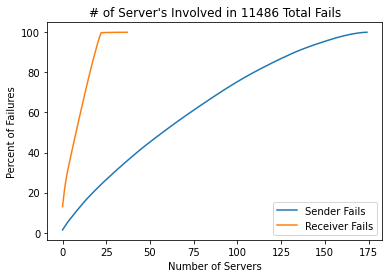

In [1]:
"""
Routines to interactively visualize network server error log files
to graphically determine which servers tend to fail and to potentially
relations between failing connections.

Created by: Tony Held tony.held@gmail.com
Created on: 2020/09/10
Copyright © 2020 Tony Held.  All rights reserved.
"""

from IPython.display import display

from network_log_reader_v02 import NetworkLogReader
from network_log_plotter_v02 import NetworkLogPlotter

if __name__ == "__main__":

    # Select log file and initialize reader/plotter
    # ---------------------------------------------
    error_log_file = "data_log_files/weight_node_node2.txt"
    nlr = NetworkLogReader(error_log_file)
    nlp = NetworkLogPlotter()

    # Select your IDE type.
    # ----------------------
    # Note that only jupyter fully supports the widget plots used in this analysis
#     python_environment = 'Pycharm'
    python_environment = 'jupyter'

    # Select the edge_type and node for the initial plot rendering
    # ------------------------------------------------------------
    # edge_types can be ['Send', 'Receive', 'Send+Receive']
    edge_type = 'Send+Receive'
    # a good starting plot_node is likely
    # nlr.receiver_fails_name[0] or nlr.sender_fails_name[1]
    plot_node = nlr.receiver_fails_name[0]

    print(f'Your selected python environment is: {python_environment}')
    print(f'{edge_type=} and {plot_node=}')

    # Create cumulative error figure
    if True:
        nlp.plot_cumulative_errors(nlr.sender_fails_count, nlr.receiver_fails_count)

    # plot_network1 uses slow built-in routines and you should use plot_network3 instead
    if False:
        nlp.plot_network1(nlr.send_graph, nlr.plot_data)

    # plot_network3 is the primary plot of interest to show failure relations.
    fig01 = nlp.plot_network3(nlr, plot_node, edge_type)

    # Figure widget interactive ability is only available in jupyter environment
    # if the environment is Pycharm, then only a static html file will be created.
    if python_environment == 'Pycharm':
        # Use .show() when in pycharm for static html figure
        fig01.show()
    elif python_environment == 'jupyter':
        # Use display in jupyter for interactive widgets
        node_hb, drop = nlp.make_widgets(nlr, fig01)
#         display(node_hb)
#         display(drop)
#         display(fig01)

In [2]:
display(node_hb)
display(drop)
display(fig01)  # Use display when in jupyter

Dropdown(description='Errors: ', index=2, options=('Send', 'Receive', 'Send+Receive'), value='Send+Receive')

FigureWidget({
    'data': [{'hoverinfo': 'text',
              'marker': {'color': [494, 430, 126, 61, 79, 68…